In [4]:


import os
import pandas as pd
import numpy as np

#  Folder Paths
augmented_folder = r"/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/final_leading_object_data"

#  Define Relevant Columns
detections_columns = [
    "objectID", "rcs", "distance","x_det", "y_det", "angleAzimuth", "angleElevation", "radialVelocity", "radialVelocityDomainMax", "yaw_rate", "ego_speed"
]
objects_columns = [
    "object_id", "orientation", "width_edge_mean", "length_edge_mean",
    "x_obj", "y_obj", "centroid_x", "centroid_y"
]

#  Initialize Counters
files_with_empty_lists = 0
files_with_missing_values = 0
files_with_inconsistent_lengths = 0
total_rows_with_empty = 0
total_rows_with_missing = 0
total_rows_with_inconsistent = 0

#  Function to Validate Augmented Data
def validate_augmented_data(df, filename):
    global files_with_empty_lists, files_with_missing_values, files_with_inconsistent_lengths
    global total_rows_with_empty, total_rows_with_missing, total_rows_with_inconsistent

    #  Check for Missing Values
    missing_values = df.isna().sum().sum()
    if missing_values > 0:
        files_with_missing_values += 1
        total_rows_with_missing += (df.isna().any(axis=1).sum())

    #  Check for Empty Lists in List-Based Columns
    def is_empty_list(value):
        return isinstance(value, (list, np.ndarray)) and len(value) == 0

    empty_lists_mask = df[detections_columns + objects_columns].applymap(is_empty_list).any(axis=1)
    empty_list_rows = empty_lists_mask.sum()

    if empty_list_rows > 0:
        files_with_empty_lists += 1
        total_rows_with_empty += empty_list_rows

    #  Validate Consistency of List-Based Column Lengths
    def check_consistency(row, columns):
        lengths = {col: len(row[col]) for col in columns if isinstance(row[col], (list, np.ndarray))}
        return len(set(lengths.values())) == 1  # Should have only 1 unique length

    inconsistent_rows = df.apply(lambda row: not check_consistency(row, detections_columns), axis=1).sum()
    if inconsistent_rows > 0:
        files_with_inconsistent_lengths += 1
        total_rows_with_inconsistent += inconsistent_rows

#  Process All Files
for filename in os.listdir(augmented_folder):
    if filename.endswith(".p"):
        file_path = os.path.join(augmented_folder, filename)
        df = pd.read_pickle(file_path)
        validate_augmented_data(df, filename)

#  Print Validation Report
print("\n **Validation Report: Augmented Data**")
print(f"⚠ Total files with empty lists: {files_with_empty_lists}")
print(f"⚠ Total rows with empty lists: {total_rows_with_empty}")
print(f"⚠ Total files with missing values: {files_with_missing_values}")
print(f"⚠ Total rows with missing values: {total_rows_with_missing}")
print(f"⚠ Total files with inconsistent list lengths: {files_with_inconsistent_lengths}")
print(f"⚠ Total rows with inconsistent list lengths: {total_rows_with_inconsistent}")

if files_with_empty_lists == 0 and files_with_missing_values == 0 and files_with_inconsistent_lengths == 0:
    print("\n **Validation Passed: Data is Clean & Consistent!**")
else:
    print("\n **Validation Failed: Issues Found in Data!**")



 **Validation Report: Augmented Data**
⚠ Total files with empty lists: 0
⚠ Total rows with empty lists: 0
⚠ Total files with missing values: 0
⚠ Total rows with missing values: 0
⚠ Total files with inconsistent list lengths: 0
⚠ Total rows with inconsistent list lengths: 0

 **Validation Passed: Data is Clean & Consistent!**


In [9]:


import os
import pandas as pd
import numpy as np

#  Folder Paths
augmented_folder = r"/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/The_DataSet"

#  Define Relevant Columns
detections_columns = [
    "objectID", "rcs", "distance", "angleAzimuth", "angleElevation", "radialVelocity", "radialVelocityDomainMax", "yaw_rate", "ego_speed"
]
objects_columns = [
    "object_id", "orientation", "width_edge_mean", "length_edge_mean",
    "transformed_x", "transformed_y", "centroid_x", "centroid_y"
]

#  Initialize Counters
files_with_empty_lists = 0
files_with_missing_values = 0
files_with_inconsistent_lengths = 0
total_rows_with_empty = 0
total_rows_with_missing = 0
total_rows_with_inconsistent = 0

#  Function to Validate Augmented Data
def validate_augmented_data(df, filename):
    global files_with_empty_lists, files_with_missing_values, files_with_inconsistent_lengths
    global total_rows_with_empty, total_rows_with_missing, total_rows_with_inconsistent

    #  Check for Missing Values
    missing_values = df.isna().sum().sum()
    if missing_values > 0:
        files_with_missing_values += 1
        total_rows_with_missing += (df.isna().any(axis=1).sum())

    #  Check for Empty Lists in List-Based Columns
    def is_empty_list(value):
        return isinstance(value, (list, np.ndarray)) and len(value) == 0

    empty_lists_mask = df[detections_columns + objects_columns].applymap(is_empty_list).any(axis=1)
    empty_list_rows = empty_lists_mask.sum()

    if empty_list_rows > 0:
        files_with_empty_lists += 1
        total_rows_with_empty += empty_list_rows

    #  Validate Consistency of List-Based Column Lengths
    def check_consistency(row, columns):
        lengths = {col: len(row[col]) for col in columns if isinstance(row[col], (list, np.ndarray))}
        return len(set(lengths.values())) == 1  # Should have only 1 unique length

    inconsistent_rows = df.apply(lambda row: not check_consistency(row, detections_columns), axis=1).sum()
    if inconsistent_rows > 0:
        files_with_inconsistent_lengths += 1
        total_rows_with_inconsistent += inconsistent_rows

#  Process All Files
for filename in os.listdir(augmented_folder):
    if filename.endswith(".p"):
        file_path = os.path.join(augmented_folder, filename)
        df = pd.read_pickle(file_path)
        validate_augmented_data(df, filename)

#  Print Validation Report
print("\n **Validation Report: Augmented Data**")
print(f"⚠ Total files with empty lists: {files_with_empty_lists}")
print(f"⚠ Total rows with empty lists: {total_rows_with_empty}")
print(f"⚠ Total files with missing values: {files_with_missing_values}")
print(f"⚠ Total rows with missing values: {total_rows_with_missing}")
print(f"⚠ Total files with inconsistent list lengths: {files_with_inconsistent_lengths}")
print(f"⚠ Total rows with inconsistent list lengths: {total_rows_with_inconsistent}")

if files_with_empty_lists == 0 and files_with_missing_values == 0 and files_with_inconsistent_lengths == 0:
    print("\n **Validation Passed: Data is Clean & Consistent!**")
else:
    print("\n **Validation Failed: Issues Found in Data!**")



 **Validation Report: Augmented Data**
⚠ Total files with empty lists: 105
⚠ Total rows with empty lists: 45290
⚠ Total files with missing values: 0
⚠ Total rows with missing values: 0
⚠ Total files with inconsistent list lengths: 0
⚠ Total rows with inconsistent list lengths: 0

 **Validation Failed: Issues Found in Data!**


In [4]:
import pickle
import pandas as pd

with open('/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/The_new_DataSet/combined_53.p', 'rb') as f:
    df = pickle.load(f)

print(df.columns)

Index(['objectID', 'rcs', 'distance', 'angleAzimuth', 'angleElevation',
       'radialVelocity', 'object_id', 'orientation', 'width_edge_mean',
       'length_edge_mean', 'centroid_x', 'centroid_y', 'transformed_x',
       'transformed_y', 'status_measurement', 'status_movement',
       'overdrivable', 'underdrivable', 'radialVelocityDomainMax', 'yaw_rate',
       'ego_speed', 'is_valid_detection'],
      dtype='object')


In [5]:
import pickle
import pandas as pd

with open('/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/The_DataSet/combined_53.p', 'rb') as f:
    df = pickle.load(f)

print(df.columns)

Index(['objectID', 'rcs', 'distance', 'angleAzimuth', 'angleElevation',
       'radialVelocity', 'object_id', 'orientation', 'width_edge_mean',
       'length_edge_mean', 'centroid_x', 'centroid_y', 'transformed_x',
       'transformed_y', 'status_measurement', 'status_movement',
       'overdrivable', 'underdrivable', 'radialVelocityDomainMax', 'yaw_rate',
       'ego_speed', 'is_valid_detection'],
      dtype='object')


In [6]:
import pickle
import pandas as pd

with open('/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/final_relevant_data/combined_53.p', 'rb') as f:
    df = pickle.load(f)

print(df.columns)

Index(['objectID', 'rcs', 'distance', 'angleAzimuth', 'angleElevation',
       'radialVelocity', 'object_id', 'orientation', 'width_edge_mean',
       'length_edge_mean', 'centroid_x', 'centroid_y', 'transformed_x',
       'transformed_y', 'status_measurement', 'status_movement',
       'overdrivable', 'underdrivable', 'radialVelocityDomainMax', 'yaw_rate',
       'ego_speed'],
      dtype='object')


In [8]:
import pickle
import pandas as pd

with open('/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/final_endgame_data/combined_53.p', 'rb') as f:
    df = pickle.load(f)

print(df.columns)

Index(['objectID', 'rcs', 'distance', 'angleAzimuth', 'angleElevation',
       'radialVelocity', 'object_id', 'orientation', 'width_edge_mean',
       'length_edge_mean', 'centroid_x', 'centroid_y', 'transformed_x',
       'transformed_y', 'status_measurement', 'status_movement',
       'overdrivable', 'underdrivable', 'radialVelocityDomainMax', 'yaw_rate',
       'ego_speed', 'is_valid_detection'],
      dtype='object')


In [1]:
import pickle
import pandas as pd

with open('/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/The_new_DataSet/combined_53.p', 'rb') as f:
    df = pickle.load(f)

print("DataFrame Info:")
print(df.info())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 82 entries, 1851 to 2343
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   objectID                 82 non-null     object 
 1   rcs                      82 non-null     object 
 2   distance                 82 non-null     object 
 3   angleAzimuth             82 non-null     object 
 4   angleElevation           82 non-null     object 
 5   radialVelocity           82 non-null     object 
 6   object_id                82 non-null     object 
 7   orientation              82 non-null     object 
 8   width_edge_mean          82 non-null     object 
 9   length_edge_mean         82 non-null     object 
 10  centroid_x               82 non-null     object 
 11  centroid_y               82 non-null     object 
 12  transformed_x            82 non-null     object 
 13  transformed_y            82 non-null     object 
 14  status_measu

In [3]:
import pickle
import pandas as pd

with open('/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/The_new_DataSet/combined_53.p', 'rb') as f:
    df = pickle.load(f)

print("Centroid X:")
print(df['centroid_x'])

print("\nCentroid Y:")
print(df['centroid_y'])

Centroid X:
1851     [99.79599738121033]
2082     [48.65599799156189]
2083      [48.1559979915619]
2084       [47.815997838974]
2085    [47.416000127792366]
                ...         
2339     [9.735999822616579]
2340     [9.395999670028688]
2341     [9.205999135971073]
2342     [9.115999937057497]
2343     [8.935999631881712]
Name: centroid_x, Length: 82, dtype: object

Centroid Y:
1851    [-1.639999926090241]
2082      [2.10999995470047]
2083    [2.1199999451637273]
2084     [2.099999964237213]
2085     [2.249999940395356]
                ...         
2339    [10.649999439716339]
2340    [10.899999439716339]
2341    [11.029999554157257]
2342    [11.029999554157257]
2343     [11.14000016450882]
Name: centroid_y, Length: 82, dtype: object


In [4]:
import pickle
import pandas as pd

with open('/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/The_new_DataSet/combined_53.p', 'rb') as f:
    df = pickle.load(f)

print(" X:")
print(df['transformed_x'])

print("\n Y:")
print(df['transformed_y'])

 X:
1851    [99.79599738121033]
2082    [48.65599799156189]
2083    [48.15599799156189]
2084      [47.815997838974]
2085    [47.41600012779236]
               ...         
2339    [9.735999822616577]
2340    [9.395999670028687]
2341     [9.20599913597107]
2342    [9.115999937057495]
2343    [8.935999631881714]
Name: transformed_x, Length: 82, dtype: object

 Y:
1851    [-1.6399999260902405]
2082       [2.10999995470047]
2083      [2.119999945163727]
2084      [2.099999964237213]
2085     [2.2499999403953552]
                ...          
2339     [10.649999439716339]
2340     [10.899999439716339]
2341     [11.029999554157257]
2342     [11.029999554157257]
2343      [11.14000016450882]
Name: transformed_y, Length: 82, dtype: object


In [17]:
import os
import numpy as np
import pandas as pd
from scipy.spatial.transform import Rotation as R
from sklearn.utils import resample

#  Folder Paths
input_folder = r"/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/The_new_DataSet"
output_folder = r"/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/True_Data"
os.makedirs(output_folder, exist_ok=True)  # Ensure output folder exists

#  Define Columns
detections_columns = [
    "objectID", "rcs", "distance", "angleAzimuth", "angleElevation",
    "radialVelocity", "is_valid_detection"
]
objects_columns = [
    "object_id", "orientation", "width_edge_mean", "length_edge_mean",
    "centroid_x", "centroid_y", "transformed_x", "transformed_y"
]
scalar_columns = ["radialVelocityDomainMax", "yaw_rate", "ego_speed"]

#  Unwanted Columns (Will be Dropped)
unwanted_columns = ["status_measurement", "status_movement", "overdrivable", "underdrivable"]

#  Helper Functions

def ensure_list(value):
    """Ensure that the value is a list (needed for augmentation)."""
    return value if isinstance(value, list) else [value]

def apply_translation(x_vals, y_vals, shift_x, shift_y):
    """Translates object and detection coordinates."""
    return [x + shift_x for x in ensure_list(x_vals)], [y + shift_y for y in ensure_list(y_vals)]

def apply_rotation(x_vals, y_vals, angle_rad):
    """Rotates object and detection coordinates around the origin."""
    cos_theta, sin_theta = np.cos(angle_rad), np.sin(angle_rad)
    rotated_x = [x * cos_theta - y * sin_theta for x, y in zip(ensure_list(x_vals), ensure_list(y_vals))]
    rotated_y = [x * sin_theta + y * cos_theta for x, y in zip(ensure_list(x_vals), ensure_list(y_vals))]
    return rotated_x, rotated_y

def apply_gaussian_noise(values, std_dev=0.05):
    """Applies small Gaussian noise to simulate sensor variation."""
    return [val + np.random.normal(0, std_dev) for val in ensure_list(values)]

def copy_paste_object(row):
    """Duplicates a valid object into a new frame."""
    return row.copy()

#  Function to Augment a Single Row
def augment_row(row):
    augmented_rows = []
    for _ in range(5):  # 5x augmentation
        aug_row = row.copy()

        # Ensure all list-based columns are in the correct format
        for col in objects_columns + detections_columns:
            aug_row[col] = ensure_list(aug_row[col])

        # Apply Translation (Shift object & detections)
        shift_x, shift_y = np.random.uniform(-1, 1), np.random.uniform(-1, 1)
        aug_row["transformed_x"], aug_row["transformed_y"] = apply_translation(
            aug_row["transformed_x"], aug_row["transformed_y"], shift_x, shift_y
        )
        aug_row["centroid_x"], aug_row["centroid_y"] = apply_translation(
            aug_row["centroid_x"], aug_row["centroid_y"], shift_x, shift_y
        )

        # Apply Rotation
        angle_rad = np.random.uniform(-0.26, 0.26)  # Radians (-15° to +15°)
        aug_row["transformed_x"], aug_row["transformed_y"] = apply_rotation(
            aug_row["transformed_x"], aug_row["transformed_y"], angle_rad
        )
        aug_row["centroid_x"], aug_row["centroid_y"] = apply_rotation(
            aug_row["centroid_x"], aug_row["centroid_y"], angle_rad
        )
        aug_row["orientation"] = [ori + angle_rad for ori in aug_row["orientation"]]  # Adjust object orientation

        # Apply Gaussian Noise (Only to detection attributes)
        for col in ["rcs", "distance", "angleAzimuth", "angleElevation", "radialVelocity"]:
            aug_row[col] = apply_gaussian_noise(aug_row[col])

        # Copy-Paste Objects (50% direct copy, 50% augmented copy)
        if np.random.rand() > 0.5:
            augmented_rows.append(copy_paste_object(aug_row))
        else:
            augmented_rows.append(aug_row)
    
    return augmented_rows

#  Process All Files
for filename in os.listdir(input_folder):
    if filename.endswith(".p"):  
        file_path = os.path.join(input_folder, filename)
        df = pd.read_pickle(file_path)

        # Drop unwanted columns
        df.drop(columns=unwanted_columns, inplace=True, errors="ignore")

        # Apply Augmentation
        augmented_data = []
        for _, row in df.iterrows():
            augmented_data.extend(augment_row(row))

        # Convert list back to DataFrame
        df_augmented = pd.DataFrame(augmented_data)

        #  **Custom Oversampling Strategy**
        unique_counts = df_augmented["object_id"].apply(len)  # Get object count per row
        max_count = unique_counts.max()

        oversampled_rows = []
        for _, row in df_augmented.iterrows():
            num_copies = max_count // len(row["object_id"])  # Compute how many times to duplicate
            for _ in range(num_copies):
                oversampled_rows.append(row.copy())

        df_balanced = pd.DataFrame(oversampled_rows)  # Convert back to DataFrame
        
        #  Final Verification Step
        original_size = len(df)
        augmented_size = len(df_balanced)
        expected_size = original_size * 5
        
        if augmented_size >= expected_size:
            print(f" {filename}: Augmentation successful! Data size increased correctly.")
        else:
            print(f" {filename}: Augmentation WARNING! Expected {expected_size}, but got {augmented_size}.")

        # Save Augmented Data
        output_path = os.path.join(output_folder, filename)
        df_balanced.to_pickle(output_path)
        print(f" Augmented Data Saved: {output_path}")

print("\n Data Augmentation & Balancing Completed! Dataset is 5x Larger & Consistent!")


 combined_194.p: Augmentation successful! Data size increased correctly.
 Augmented Data Saved: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/True_Data/combined_194.p
 combined_218.p: Augmentation successful! Data size increased correctly.
 Augmented Data Saved: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/True_Data/combined_218.p
 combined_62.p: Augmentation successful! Data size increased correctly.
 Augmented Data Saved: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/True_Data/combined_62.p
 combined_197.p: Augmentation successful! Data size increased correctly.
 Augmented Data Saved: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/True_Data/combined_197.p
 combined_157.p: Augmentation successful! Data size increased correctly.
 Augmented Data Saved: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/True_Data/combined_157.p
 combined_141.p: Augmentation successful! Data size increased correctly.
 Augmented Data Saved: /

📂 Loading Augmented File: combined_162.p


No handles with labels found to put in legend.


🎯 Selected Object ID: 6570, Total Rows: 10


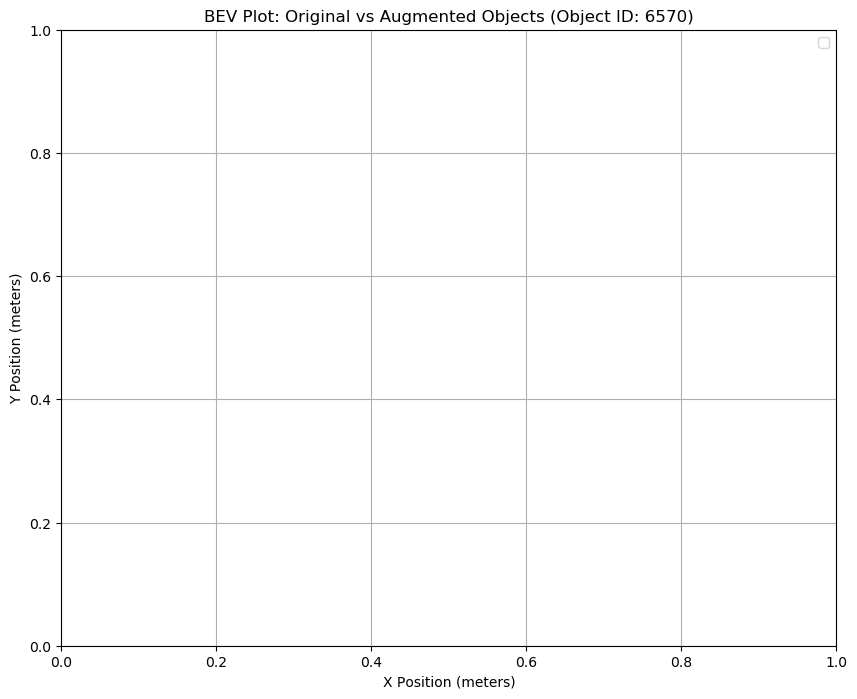

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

#  Set Folder Paths
augmented_folder = r"/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/The_augmented_data"

#  Load a Random Augmented File
file_list = [f for f in os.listdir(augmented_folder) if f.endswith(".p")]
filename = random.choice(file_list)  # Select a random augmented file
file_path = os.path.join(augmented_folder, filename)

print(f" Loading Augmented File: {filename}")
df = pd.read_pickle(file_path)

#  Identify a Random Object ID
object_ids = df["object_id"].explode().unique()  # Get unique object IDs
selected_object_id = random.choice(object_ids)

#  Filter Rows Where This Object Exists
df_selected = df[df["object_id"].apply(lambda obj_list: selected_object_id in obj_list)]
print(f" Selected Object ID: {selected_object_id}, Total Rows: {len(df_selected)}")

#  Extract Columns
detections_columns = ["objectID", "rcs", "distance", "angleAzimuth", "angleElevation", "radialVelocity"]
objects_columns = ["object_id", "orientation", "width_edge_mean", "length_edge_mean", "centroid_x", "centroid_y", "transformed_x", "transformed_y"]
scalar_columns = ["radialVelocityDomainMax", "yaw_rate", "ego_speed"]

#  Function to Extract Valid Objects
def extract_valid_objects(row):
    """Extracts valid object positions for plotting based on is_valid_detection."""
    if "is_valid_detection" not in row or not isinstance(row["is_valid_detection"], list):
        return [], [], [], [], []  # Return empty lists if no valid objects

    valid_indices = [i for i, valid in enumerate(row["is_valid_detection"]) if valid == 1]

    if not valid_indices:
        return [], [], [], [], []  # Skip rows with no valid detections

    transformed_x = [row["transformed_x"][i] for i in valid_indices if i < len(row["transformed_x"])]
    transformed_y = [row["transformed_y"][i] for i in valid_indices if i < len(row["transformed_y"])]
    centroid_x = [row["centroid_x"][i] for i in valid_indices if i < len(row["centroid_x"])]
    centroid_y = [row["centroid_y"][i] for i in valid_indices if i < len(row["centroid_y"])]
    orientation = [row["orientation"][i] for i in valid_indices if i < len(row["orientation"])]

    return transformed_x, transformed_y, centroid_x, centroid_y, orientation

#  Initialize Plot
plt.figure(figsize=(10, 8))
colors = ["blue", "green", "red", "purple", "orange", "brown", "cyan", "magenta"]

#  Loop Through Augmented Rows for This Object
for idx, (_, row) in enumerate(df_selected.iterrows()):
    transformed_x, transformed_y, centroid_x, centroid_y, orientation = extract_valid_objects(row)

    # Skip if no valid objects
    if not transformed_x or not transformed_y:
        continue

    # Plot object positions
    plt.scatter(transformed_x, transformed_y, color=colors[idx % len(colors)], alpha=0.5, label=f"Augment {idx}")

    # Plot centroids
    plt.scatter(centroid_x, centroid_y, color="black", marker="x", s=100, label="Centroid")

    # Indicate orientation
    for cx, cy, angle in zip(centroid_x, centroid_y, orientation):
        plt.arrow(cx, cy, 0.5 * np.cos(angle), 0.5 * np.sin(angle), head_width=0.2, color="black")

#  Set Labels & Legend
plt.xlabel("X Position (meters)")
plt.ylabel("Y Position (meters)")
plt.title(f"BEV Plot: Original vs Augmented Objects (Object ID: {selected_object_id})")
plt.legend()
plt.grid()
plt.show()

📂 Loading Augmented File: combined_59.p
🎯 Selected Object ID: 3401, Total Rows: 60


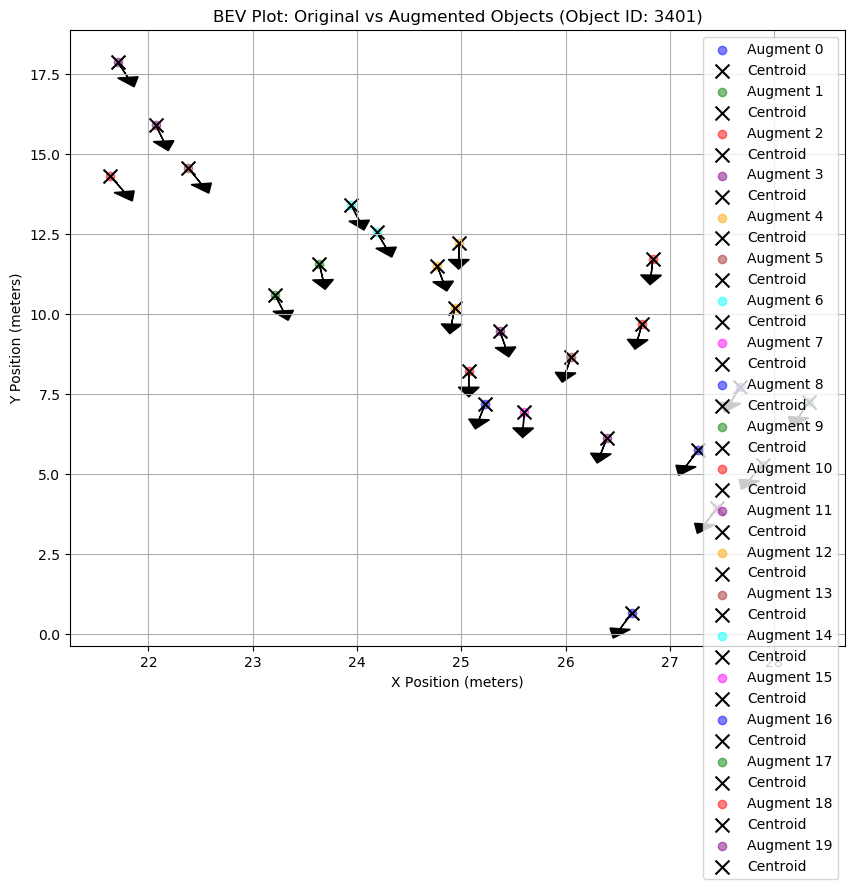

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

#  Set Folder Paths
augmented_folder = r"/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/The_augmented_data"

#  Load a Random Augmented File
file_list = [f for f in os.listdir(augmented_folder) if f.endswith(".p")]
filename = random.choice(file_list)  # Select a random augmented file
file_path = os.path.join(augmented_folder, filename)

print(f" Loading Augmented File: {filename}")
df = pd.read_pickle(file_path)

#  Identify a Random Object ID
object_ids = df["object_id"].explode().unique()  # Get unique object IDs
selected_object_id = random.choice(object_ids)

#  Filter Rows Where This Object Exists
df_selected = df[df["object_id"].apply(lambda obj_list: selected_object_id in obj_list)]
print(f" Selected Object ID: {selected_object_id}, Total Rows: {len(df_selected)}")

#  Extract Columns
detections_columns = ["objectID", "rcs", "distance", "angleAzimuth", "angleElevation", "radialVelocity"]
objects_columns = ["object_id", "orientation", "width_edge_mean", "length_edge_mean", "centroid_x", "centroid_y", "transformed_x", "transformed_y"]
scalar_columns = ["radialVelocityDomainMax", "yaw_rate", "ego_speed"]

#  Function to Extract Valid Objects
def extract_valid_objects(row):
    """Extracts valid object positions for plotting based on is_valid_detection."""
    if "is_valid_detection" not in row or not isinstance(row["is_valid_detection"], list):
        print(f" Missing or Invalid 'is_valid_detection' in Row {row.name}. Skipping!")
        return [], [], [], [], []  # Return empty lists if no valid objects

    valid_indices = [i for i, valid in enumerate(row["is_valid_detection"]) if valid == 1]

    if not valid_indices:
        print(f" No valid objects found in Row {row.name}. Skipping!")
        return [], [], [], [], []  # Skip rows with no valid detections

    transformed_x = [row["transformed_x"][i] for i in valid_indices if i < len(row["transformed_x"])]
    transformed_y = [row["transformed_y"][i] for i in valid_indices if i < len(row["transformed_y"])]
    centroid_x = [row["centroid_x"][i] for i in valid_indices if i < len(row["centroid_x"])]
    centroid_y = [row["centroid_y"][i] for i in valid_indices if i < len(row["centroid_y"])]
    orientation = [row["orientation"][i] for i in valid_indices if i < len(row["orientation"])]

    return transformed_x, transformed_y, centroid_x, centroid_y, orientation

#  Initialize Plot
plt.figure(figsize=(10, 8))
colors = ["blue", "green", "red", "purple", "orange", "brown", "cyan", "magenta"]

#  Loop Through Augmented Rows for This Object
valid_data_found = False  # Flag to track if valid objects exist

for idx, (_, row) in enumerate(df_selected.iterrows()):
    transformed_x, transformed_y, centroid_x, centroid_y, orientation = extract_valid_objects(row)

    # Skip if no valid objects
    if not transformed_x or not transformed_y:
        continue

    valid_data_found = True  # Mark that we found valid objects

    # Plot object positions
    plt.scatter(transformed_x, transformed_y, color=colors[idx % len(colors)], alpha=0.5, label=f"Augment {idx}")

    # Plot centroids
    plt.scatter(centroid_x, centroid_y, color="black", marker="x", s=100, label="Centroid")

    # Indicate orientation
    for cx, cy, angle in zip(centroid_x, centroid_y, orientation):
        plt.arrow(cx, cy, 0.5 * np.cos(angle), 0.5 * np.sin(angle), head_width=0.2, color="black")

#  Set Labels & Legend
if valid_data_found:
    plt.xlabel("X Position (meters)")
    plt.ylabel("Y Position (meters)")
    plt.title(f"BEV Plot: Original vs Augmented Objects (Object ID: {selected_object_id})")
    plt.legend()
    plt.grid()
    plt.show()
else:
    print(f" No valid objects found in the selected file '{filename}'. Try another file!")

In [ ]:
import os
import pandas as pd
import shutil

#  Folder Paths
augmented_folder = r"/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/The_augmented_data"
excluded_folder = os.path.join(augmented_folder, "excluded_empty_files")  # Store empty files separately
os.makedirs(excluded_folder, exist_ok=True)  # Ensure the folder exists

#  Initialize Counters
total_files = 0
empty_files = 0
files_moved = 0
valid_files = 0
empty_file_list = []

#  Process All Files in the Augmented Folder
print("\n *Checking Augmented Files for Valid Objects...*\n")

for filename in os.listdir(augmented_folder):
    if filename.endswith(".p"):  
        file_path = os.path.join(augmented_folder, filename)
        df = pd.read_pickle(file_path)  # Load the dataset
        total_files += 1  # Count total files
        
        #  Check for "is_valid_detection" column
        if "is_valid_detection" not in df.columns:
            print(f"⚠ Warning: Column 'is_valid_detection' missing in {filename}. Skipping this file.")
            continue  # Skip if the column is missing
        
        #  Ensure values in 'is_valid_detection' are list-based
        df["valid_count"] = df["is_valid_detection"].apply(lambda x: sum(x) if isinstance(x, (list, tuple)) else 0)

        #  Total valid detections in the file
        total_valid_objects = df["valid_count"].sum()

        if total_valid_objects == 0:  # No valid objects in the entire file
            empty_files += 1
            empty_file_list.append(filename)

            #  Move file to "excluded_empty_files/" folder (instead of deleting)
            destination_path = os.path.join(excluded_folder, filename)
            shutil.move(file_path, destination_path)
            files_moved += 1
            print(f" {filename} moved to excluded folder (Zero valid objects).")
        else:
            valid_files += 1  # Count valid files
            print(f" {filename} kept for training (Valid objects found).")

#  Print Final Summary
print("\n *Augmented Data Validation Report*")
print(f" Total Files Checked: {total_files}")
print(f" Files with Zero Valid Objects: {empty_files}")
print(f" Valid Files Retained: {valid_files}")
print(f" Moved to Excluded Folder: {files_moved}")

#  Print the list of moved files (Optional)
if files_moved > 0:
    print("\n *List of Excluded Files:*")
    for f in empty_file_list:
        print(f"   - {f}")

print("\n *Process Completed: Empty files moved, valid data retained!*")


🔍 *Checking Augmented Files for Valid Objects...*

✅ combined_194.p kept for training (Valid objects found).
✅ combined_218.p kept for training (Valid objects found).
✅ combined_62.p kept for training (Valid objects found).
✅ combined_197.p kept for training (Valid objects found).
✅ combined_157.p kept for training (Valid objects found).
✅ combined_141.p kept for training (Valid objects found).
✅ combined_148.p kept for training (Valid objects found).
✅ combined_80.p kept for training (Valid objects found).
✅ combined_55.p kept for training (Valid objects found).
✅ combined_210.p kept for training (Valid objects found).
✅ combined_165.p kept for training (Valid objects found).
✅ combined_138.p kept for training (Valid objects found).
✅ combined_227.p kept for training (Valid objects found).
✅ combined_144.p kept for training (Valid objects found).
✅ combined_170.p kept for training (Valid objects found).
✅ combined_69.p kept for training (Valid objects found).
✅ combined_134.p kept fo

In [10]:
import os
import pandas as pd
import numpy as np

# Define folder path (Replace with actual path before running)
input_folder = r"/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/The_augmented_data"

# Define distance thresholds
range_thresholds = [100, 150, 250]

# Dictionary to store object counts per range category
object_counts = {threshold: 0 for threshold in range_thresholds}

# Process all files in the folder
for filename in os.listdir(input_folder):
    if filename.endswith(".p"):  # Process only pickle files
        file_path = os.path.join(input_folder, filename)
        df = pd.read_pickle(file_path)
        
        # Check if the 'distance' column exists
        if "distance" not in df.columns:
            print(f"⚠ Warning: 'distance' column not found in {filename}, skipping.")
            continue
        
        # Iterate through rows and count objects within defined ranges
        for distances in df["distance"]:
            if isinstance(distances, list):  # Ensure it's a list of distances
                for distance in distances:
                    for threshold in range_thresholds:
                        if distance <= threshold:
                            object_counts[threshold] += 1
                            break  # Avoid double counting
        
print("\n Object Count by Distance Ranges:")
for threshold, count in object_counts.items():
    print(f"- Objects within {threshold}m: {count}")

# Suggestion based on object distribution
if object_counts[100] > object_counts[150] * 1.5:
    print("\n Recommendation: Consider keeping objects up to 100m for better density and reliability.")
elif object_counts[150] > object_counts[250] * 1.5:
    print("\n Recommendation: Consider removing objects beyond 150m due to lower density.")
else:
    print("\n The data appears well distributed. Consider keeping all objects up to 250m.")


📊 Object Count by Distance Ranges:
- Objects within 100m: 177398319
- Objects within 150m: 48026032
- Objects within 250m: 51618530

💡 Recommendation: Consider keeping objects up to 100m for better density and reliability.


In [ ]:
import os
import numpy as np
import pandas as pd

#  Define Folder Path (Replace with your actual path)
input_folder = r"/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/The_augmented_data"

#  Define Relevant Columns
detections_columns = [
    "objectID", "rcs", "distance", "angleAzimuth", "angleElevation", 
    "radialVelocity", "is_valid_detection"
]
objects_columns = [
    "object_id", "orientation", "width_edge_mean", "length_edge_mean",
    "centroid_x", "centroid_y", "transformed_x", "transformed_y"
]
scalar_columns = ["radialVelocityDomainMax", "yaw_rate", "ego_speed"]

#  Object Count Dictionary
range_categories = {
    "within_100m": 0,
    "within_150m": 0,
    "within_250m": 0
}

files_with_zero_valid_objects = []
files_with_issues = []

#  Function to Analyze Each File
def analyze_file(file_path, filename):
    global range_categories

    # Load Data
    df = pd.read_pickle(file_path)

    #  Check for Valid Objects
    total_valid_objects = 0
    for _, row in df.iterrows():
        valid_objects = [obj_id for obj_id, valid_flag in zip(row["objectID"], row["is_valid_detection"]) if valid_flag == 1]
        total_valid_objects += len(valid_objects)

        #  Categorize objects based on distance
        for dist in row["distance"]:
            if dist <= 100:
                range_categories["within_100m"] += 1
            elif dist <= 150:
                range_categories["within_150m"] += 1
            elif dist <= 250:
                range_categories["within_250m"] += 1

    #  Log files with zero valid objects
    if total_valid_objects == 0:
        files_with_zero_valid_objects.append(filename)

    #  Check for Potential Issues (e.g., empty lists, inconsistencies)
    if df.isnull().values.any() or df.empty:
        files_with_issues.append(filename)

#  Process All Files
for filename in os.listdir(input_folder):
    if filename.endswith(".p"):
        file_path = os.path.join(input_folder, filename)
        analyze_file(file_path, filename)

#  Print Results
print("\n *Object Distribution Analysis by Range:*")
print(f" Objects within 100m: {range_categories['within_100m']}")
print(f" Objects within 150m: {range_categories['within_150m']}")
print(f" Objects within 250m: {range_categories['within_250m']}")

print("\n *Files with Zero Valid Objects:*")
if files_with_zero_valid_objects:
    for file in files_with_zero_valid_objects:
        print(f" {file}")
else:
    print(" No files found with zero valid objects.")

print("\n *Files with Potential Issues (Empty or Corrupt Data):*")
if files_with_issues:
    for file in files_with_issues:
        print(f" {file}")
else:
    print(" No corrupted or empty files detected.")

#  Recommendation Based on Object Distribution
total_objects = sum(range_categories.values())
if range_categories["within_100m"] / total_objects < 0.2:
    print("\n Warning: Only a small percentage of objects are within 100m. Consider filtering out long-range detections.")
elif range_categories["within_250m"] / total_objects > 0.5:
    print("\n Warning: More than 50% of objects are beyond 150m. Validate whether long-range objects are meaningful.")
else:
    print("\n Object distribution looks balanced for training.")

print("\n *Analysis Completed!*")


🔍 *Object Distribution Analysis by Range:*
📍 Objects within 100m: 177398319
📍 Objects within 150m: 48026032
📍 Objects within 250m: 51618530

🔍 *Files with Zero Valid Objects:*
✅ No files found with zero valid objects.

🔍 *Files with Potential Issues (Empty or Corrupt Data):*
✅ No corrupted or empty files detected.

✅ Object distribution looks balanced for training.

🚀 *Analysis Completed!*
